In [1]:
import wordgraph as wg
import pandas as pd
from ggplot import * 
import numpy as np
import matplotlib.pyplot as plt
import powerlaw 
import os

G = wg.WordGraph()

Loop through all the generated graphs and fit their degree distributions with powerlaw and other functions

In [2]:
def fit_powerlaws_to_graphs(data_dir, dataset):
    df = pd.DataFrame(columns=['dataset', 'epsilon', 'alpha', 'sigma', 
                               'pl_vs_exp_R', 'pl_vs_exp_p', 
                               'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if not file.startswith("."):
                G = wg.WordGraph()
                G.load_pickle(os.path.join(root, file))
                pl_result = G.fit_power_law()
                
                R1, p1 = pl_result.distribution_compare('power_law', 
                                                        "exponential")
                R2, p2 = pl_result.distribution_compare('power_law', 
                                                        "truncated_power_law")
                
                row = pd.DataFrame([[dataset, G.epsilon, pl_result.alpha, 
                                     pl_result.sigma, R1, p1, R2, p2]], 
                                   columns=['dataset','epsilon', 'alpha', 'sigma', 
                                            'pl_vs_exp_R', 'pl_vs_exp_p', 
                                            'pl_vs_truncpl_R', 'pl_vs_truncpl_p'])
                df = df.append(row, ignore_index=True)
    return df

### Fit SEEDLings Graphs

In [3]:
%%capture
seed_powerlaw_df = fit_powerlaws_to_graphs('../semspace_output/seedlings_all', 'seedlings')
seed_powerlaw_df.to_csv('output/seedlings_powerlaw_fits.csv')

### Fit COCA Graphs

In [4]:
%%capture
coca_powerlaw_df = fit_powerlaws_to_graphs('../semspace_output/coca_all', 'coca')
coca_powerlaw_df.to_csv('output/coca_powerlaw_fits.csv')

In [5]:
pl_fit = seed_powerlaw_df.append(coca_powerlaw_df, ignore_index=True)

## Plot alpha as a function of epsilon

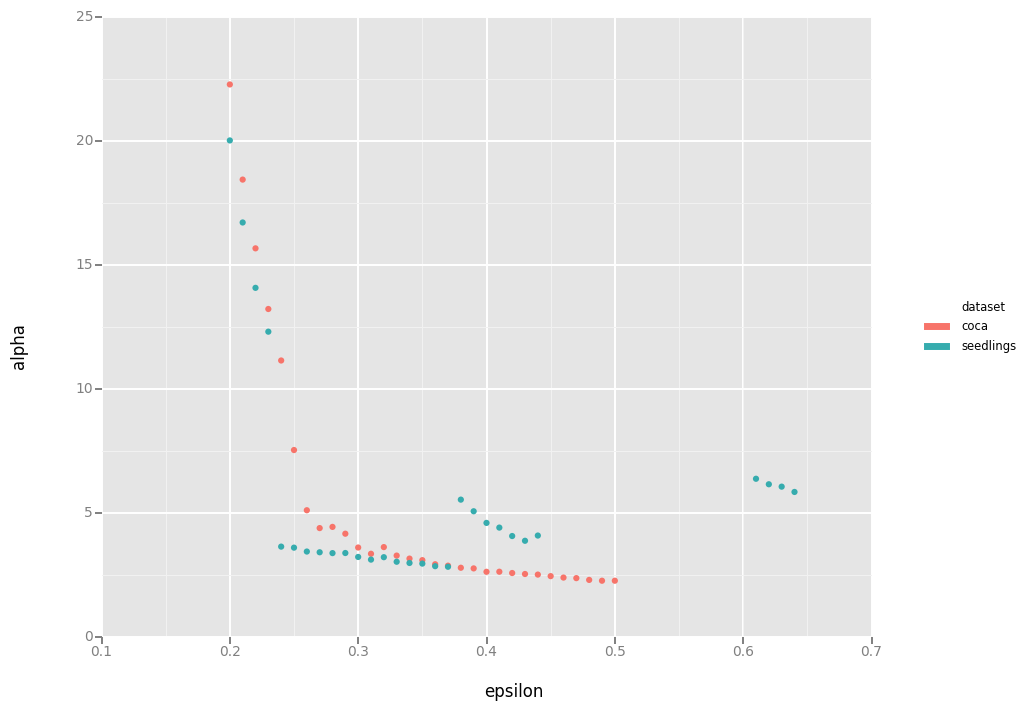

<ggplot: (279966984)>

In [6]:
pl_fit = pl_fit.query('pl_vs_exp_R > 0')

ggplot(pl_fit , aes(x='epsilon', y='alpha', group='dataset', color='dataset')) +\
    geom_point()

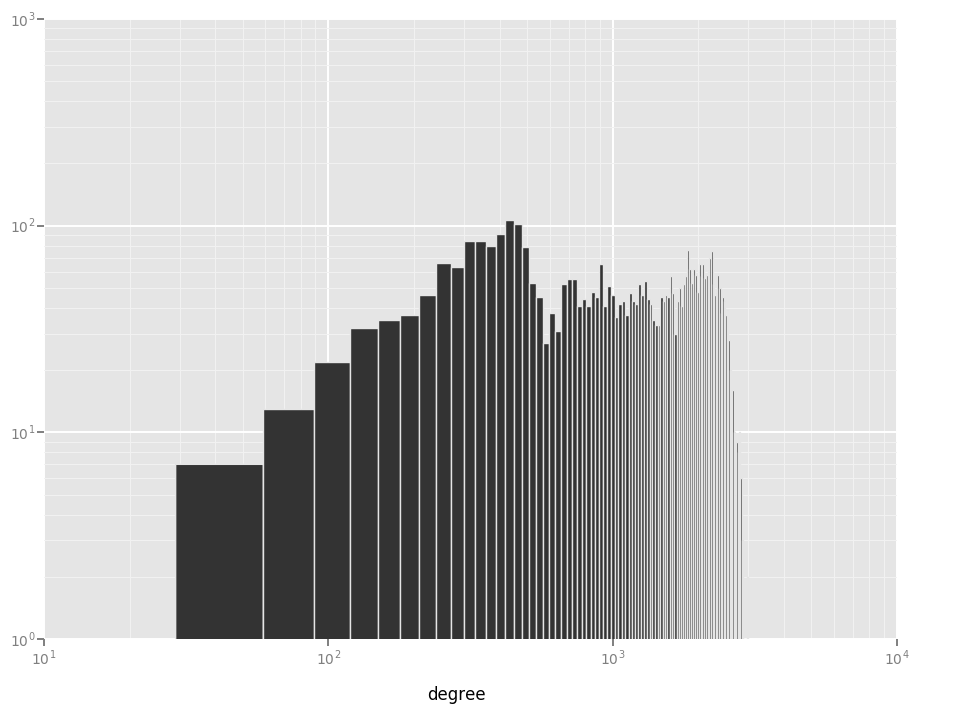

<ggplot: (278892836)>

In [26]:
G.load_pickle('../semspace_output/seedlings_all/cos_0.88')
deg_dist = G.degree_distribution()
ggplot(deg_dist, aes(x='degree'))+\
    geom_histogram(binwidth=30)+\
    scale_y_log()+\
    scale_x_log()

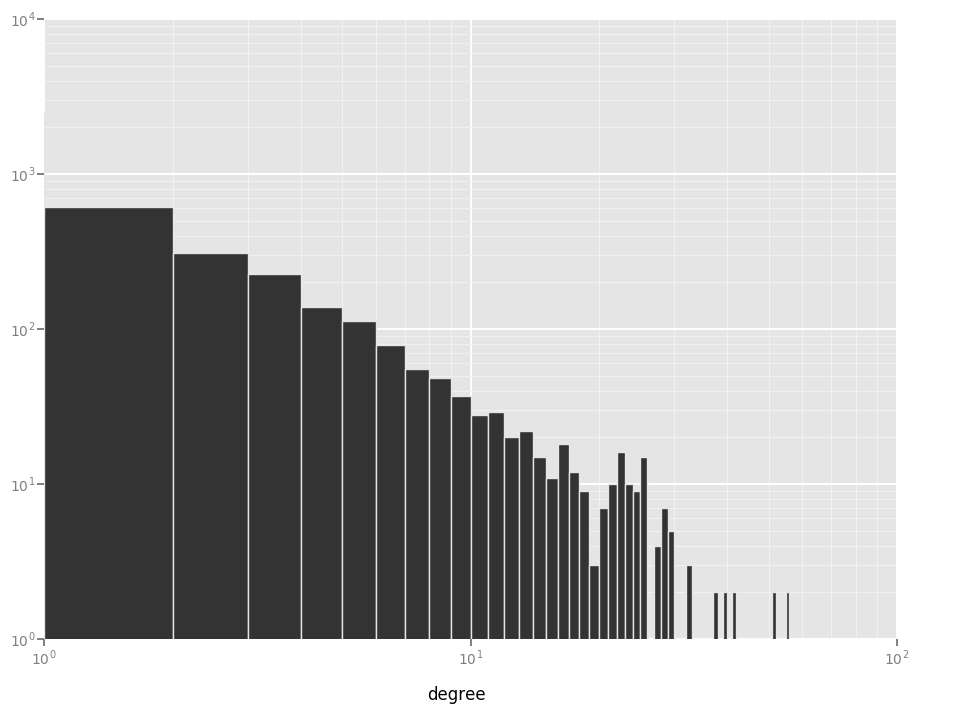

<ggplot: (-9223372036576398897)>

In [12]:
G.load_pickle('../semspace_output/seedlings_all/cos_0.4')
deg_dist = G.degree_distribution()

ggplot(deg_dist, aes(x='degree'))+\
    geom_histogram(binwidth=1) +\
    scale_y_log()+\
    scale_x_log()

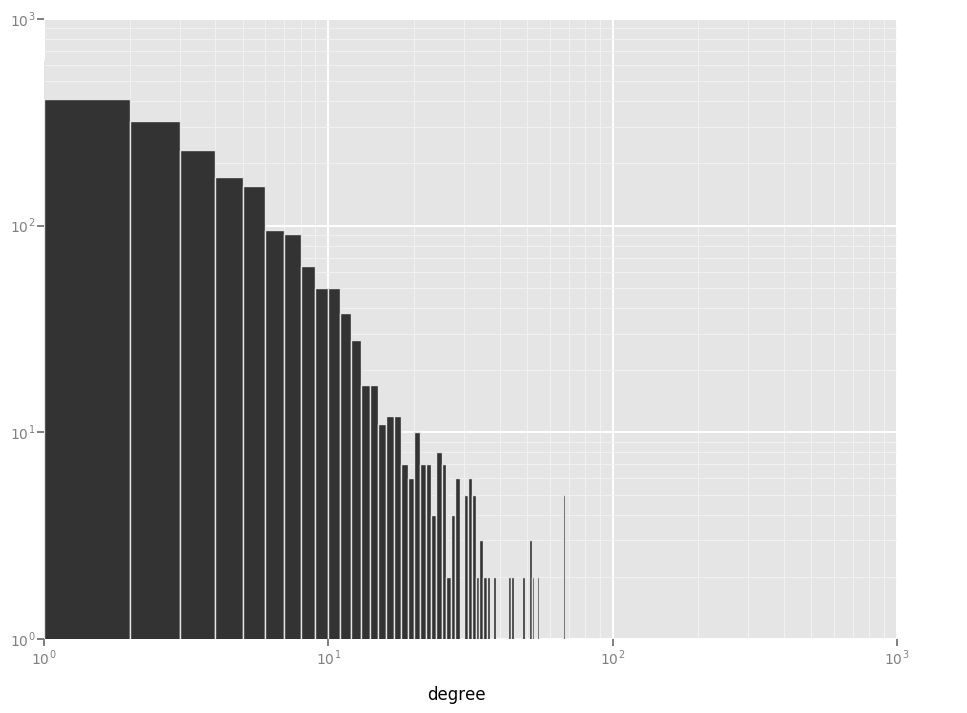

<ggplot: (281748607)>

In [11]:
G = wg.WordGraph()
G.load_pickle('../semspace_output/coca_all/cos_0.4')

deg_dist = G.degree_distribution()

ggplot(deg_dist, aes(x='degree'))+\
    geom_histogram(binwidth=1) +\
    scale_y_log()+\
    scale_x_log()

In [4]:
# G.fit_power_law().plot_pdf(original_data=True)
# plt.show()
# G.degree_distribution()['degree'] 

In [7]:
G.fit_power_law().plot_pdf(original_data=False)
plt.show()

G.fit_power_law().alphas

AttributeError: 'WordGraph' object has no attribute 'graph'

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


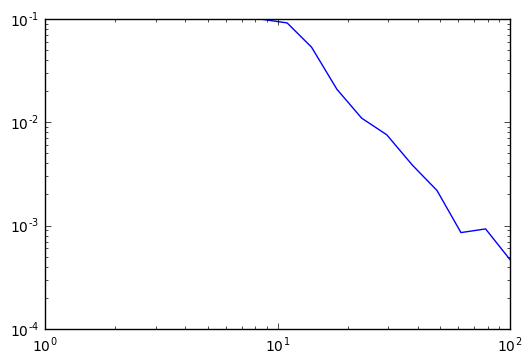

In [12]:
G.fit_power_law().plot_pdf(original_data=False)
plt.show()

In [15]:
G.fit_power_law().Ds

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


array([ 0.11616037,  0.10721904,  0.08728808,  0.0766457 ,  0.07630331,
        0.08054841,  0.08856899,  0.09271685,  0.09669181,  0.10698993,
        0.11458772,  0.12215702,  0.13637397,  0.1479538 ,  0.16148401,
        0.16825667,  0.16651712,  0.17972382,  0.17667498,  0.16030242,
        0.10684985,  0.05266313,  0.06283368,  0.06725793,  0.07548103,
        0.08371073,  0.09495304,  0.10450838,  0.12377243,  0.15148611,
        0.14129256,  0.13924956,  0.154303  ,  0.15841245,  0.1615269 ,
        0.1632704 ,  0.16313259,  0.17825194,  0.17427562,  0.18132547,
        0.19458627,  0.20422241,  0.21324365,  0.22191587,  0.23149454,
        0.14858785,  0.14996647,  0.15180917,  0.2394915 ,  0.36466472])